In [0]:
%matplotlib inline

# Seminario 1 : Aprender a construir redes neuronales simples

###Autores: 

Rafael López, lopgon.rafael@gmail.com

Jose Sanchez, josangar.sg@gmail.com




##Estructura del seminario

1. Definición de requisitos
2. Estructura de un proyecto de Deep Learning
3. Construcción de una red neuronal fully connected mediante Keras
4. Construcción de una red neuronal convolucional mediante Keras
5. Caso práctico
6. Conclusiones
7. Configuración del entorno de trabajo local





## 1. Definición de requisitos

### 1.1 Requisitos de software

#### Lenguaje de programación: 
  - Python 3.6
  
### Librerías:
  - **Tensorflow**: es una librería de software de código abierto para computación numérica, que utiliza gráficos de flujo de datos.
  
  - **Keras**: es un framework de alto nivel para el aprendizaje, escrito en Python y capaz de correr sobre los frameworks TensorFlow, CNTK, o Theano. Fue desarrollado con el objeto de facilitar un proceso de experimentación rápida.
  
  - **NumPy**: es una librería de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.
  
  - **Matplotlib**: es una librería para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy. 

### 1.2 Requisitos de datos

MNIST es un conjunto de datos de imagen público que consta de una imagen de 28 por 28 píxeles de un solo dígito escrita a mano. Cada imagen en MNIST es un dígito del 0 al 9. El desafío del MNIST es desarrollar un algoritmo de aprendizaje automático que pueda clasificar estas imágenes en 10 clases (0 a 9)

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/dataset.jpeg)


### 1.3 Importación de dependencias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

from keras.datasets import mnist # Dataset a utilizar
from keras.models import Model # Modelo sobre el que se definen las redes neuronales
from keras.layers import Input, Dense, Dropout # Capas red fully connected
from keras.layers import Conv2D, MaxPool2D, Flatten # Capas red para convolucional
from keras.utils import np_utils # Utilidades para procesar datos

Using TensorFlow backend.


## 2. Estructura de un proyecto de Deep Learning

- Preparación del dataset
- Carga de datos
- Diseño de la arquitectura de la red neuronal
- Entrenamiento
- Evaluación del modelo


## 3. Construcción de una red neuronal fully connected mediante Keras



![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/mnist.PNG)

### 3.1 Carga de datos

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_testval, y_testval) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


#### Visualización de datos

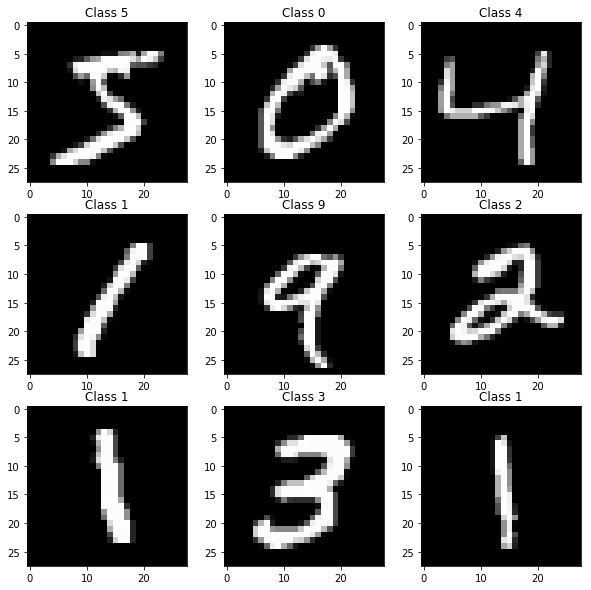

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

#### Preproceso de datos

- Reshape de la imagenes (2D) a vectores (1D)
- Convertir tipo de datos a coma flotante
- Normalización de rangos de intensidad de las imágenes a 0-1.

In [5]:
X_train = X_train.reshape(60000, 784)
X_testval = X_testval.reshape(10000, 784)
X_train = X_train.astype('float32')
X_testval = X_testval.astype('float32')
X_train /= 255
X_testval /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_testval.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


#### Preproceso de etiquetas

- One-hot-encoding

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [6]:
print('Y_train from 0 to 9')
print(y_train[:10])
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_testval = np_utils.to_categorical(y_testval, nb_classes)
print('Y_train onehot encoding')
print(Y_train[:10])

Y_train from 0 to 9
[5 0 4 1 9 2 1 3 1 4]
Y_train onehot encoding
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#### Partición de datos de test en subset de validación y subset de test

In [7]:
X_val = X_testval[:int(X_testval.shape[0]/2)]
Y_val = Y_testval[:int(Y_testval.shape[0]/2)]
X_test = X_testval[int(X_testval.shape[0]/2):]
Y_test = Y_testval[int(Y_testval.shape[0]/2):]
y_test = np.argmax(Y_test, axis=1)
print("Validation matrix shape", X_val.shape)
print("Testing matrix shape", X_test.shape)

Validation matrix shape (5000, 784)
Testing matrix shape (5000, 784)



### 3.2 Diseño de la arquitectura de la red neuronal

Podemos interpretar que cada peso, wi, representa la influencia relativa de la entrada por la cual se multiplica, xi. A menudo al término b se le llama sesgo (en inglés bias), ya que controla qué tan predispuesta está la neurona a disparar un 1 o un 0 independiente de los pesos. Un sesgo alto hace que la neurona requiera una entrada más alta para generar una salida de 1. Un sesgo bajo lo hace más fácil.

Podemos obtener una verdadera red neuronal a partir de esta fórmula si introducimos dos inovaciones. La primera es la adición de una función de activación, la cual transforma nuestra discirimador lineal en lo que se llama una neurona, o “unidad” (para disociarlo de analogías del cerebro). La segunda inovación consiste en organizar las neuronas de una manera particular: una arquitectura de neuronas conectadas secuencialmente en capas. 

Tanto en las redes neuronales artificiales como biológicas, una neurona no sólo transmite la entrada que recibe. Existe un paso adicional, una función de activación, que es análoga a la tasa de potencial de acción disparando en el cerebro. La función de activación utiliza la misma suma ponderada de la entrada anterior, 

                                                              z= b+∑wi*xi, 

y la transforma una vez más como salida.

La mayoría de las redes neuronales actuales usan otro tipo de función de activación llamada rectified linear unit o ReLU. A pesar del nombre complicado, se define simplemente como 


![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/relu.png)


Las ReLUs permiten el paso de todos los valores positivos sin cambiarlos, pero asigna todos los valores negativos a 0. Aunque existen funciones de activación aún más recientes, la mayoría de las redes neuronales de hoy utilizan ReLU o una de sus variantes.

Independiente de la función de activación que utilizemos, podemos visualizar una neurona individual con el siguiente diagrama, una visual representativa e intuitiva del comportamiento de una neurona.

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/neuron-anatomy.jpg)

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/neuron-simple.jpg)

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/diagrama_neurona.PNG)

Ahora que hemos descrito una neurona, podemos definir una red neuronal. Una red neuronal consiste en una serie de capas de neuronas. Específicamente, todas las neuronas de una capa se conectan a las neuronas de la siguiente capa.

Un detalle es que cuanto contamos el número de capas en una red neuronal, sólo contamos las capas con entradas (omitimos la primera capa de entrada). La figura anterior representa una red neuronal de 2 capas con 1 capa oculta. Contiene 3 neuronas de entrada, 2 neuronas en la capa oculta, y 1 neurona de salida.

Otra manera de interpretar esta idea es que las capas ocultas representan “características” a nivel superior o atributos de nuestros datos. Cada una de las neuronas de una capa oculta sopesa sus entradas de forma diferente, y de esta manera aprende características diferentes de los datos. Nuestra neurona de salida logra capturar estas características intermediarias, no sólo las entradas originales. Al incluir más de una capa oculta, permitimos que la red neuronal pueda aprender sobre varios niveles de abstracción de los datos.

Si encadenamos múltiples transformaciones no lineales a través de las capas, aumentamos la flexibilidad y capacidad de expresión de la red neuronal. Aunque la prueba es compleja y mucho más avanzada de lo que podemos cubrir en este seminario, se puede demostrar que cualquier red neuronal de 2 capas con una función de activación no lineal (incluyendo la sigmoide o ReLU) y con suficientes neuronas ocultas es un aproximador de función universal (en inglés, universal function approximator), es decir teóricamente es capaz de expresar cualquier mapeo arbitrario de entrada-a-salida. Las redes neuronales son poderosas precisamente por esta propiedad.



In [8]:
input_layer = Input(shape=(X_train.shape[1],)) # Declaramos las dimensionesde los datos de entrada a la red
hidden_layer = Dense(32, activation='relu')(input_layer) # Definimos una capa oculta y su función de activación
output_layer = Dense(10, activation='softmax')(hidden_layer) # Definimos la capa de salida y su función de activación
model= Model(inputs=input_layer, outputs=output_layer) # Generamos el modelo de keras a partir de las capas que hemos definido
model.summary()

W0626 17:10:08.425723 140014447961984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 17:10:08.469702 140014447961984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 17:10:08.480138 140014447961984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


#### Compilación del modelo
Keras está construido sobre Tensorflow, el cuál permite definir un grafo de computación en Python que posteriormente se compila y se lanza de forma eficiente en la CPU (o GPU) sin utilizar el intérprete de Python.

Cuando se compila un modelo, debemos especificar la función de coste y el optimizador:
 
- **Función de coste**: define como se mide el error de la red en función de las diferencias entre las predicciones de la red y las etiquetas de los datos de entrenamiento.
- **Optimizador**: determina como aprende el modelo, es decir, como se propaga el error a la salida de la red por las diferentes capas de la misma. 




In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0626 17:10:08.533117 140014447961984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0626 17:10:08.572799 140014447961984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### 3.3 Entrenamiento

- Definir batch_size
- Definir número de epochs (iteraciones de entrenamiento)
- Intruducir datos para la validación del entrenamiento

In [10]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(X_val, Y_val)
         )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
W0626 17:10:08.889652 140014447961984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0626 17:10:08.949606 140014447961984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 5000 samples
Epoch 1/4
60000/60000 [==============================] - 2s 35us/step - loss: 0.5149 - acc: 0.8568 - val_loss: 0.3559 - val_acc: 0.8956
Epoch 2/4
60000/60000 [==============================] - 1s 22us/step - loss: 0.2525 - acc: 0.9280 - val_loss: 0.2870 - val_acc: 0.9140
Epoch 3/4
60000/60000 [==============================] - 1s 22us/step - loss: 0.2069 - acc: 0.9406 - val_loss: 0.2459 - val_acc: 0.9290
Epoch 4/4
60000/60000 [==============================] - 1s 23us/step - loss: 0.1774 - acc: 0.9491 - val_loss: 0.2184 - val_acc: 0.9354


### 3.4 Evaluación del modelo

#### Obtención de métricas

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.11897439984828234
Test accuracy: 0.9666


#### Inspección de las predicciones

In [0]:
# Predecimos las clases de los datos de test y las post-procesamos para trabajar
# cómodament con ellas
predicted_classes = model.predict(X_test)
predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Obtenemos los índices de las muestras que se han predecido correcta e 
# incorrectamente para mostrarlas posteriomente
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

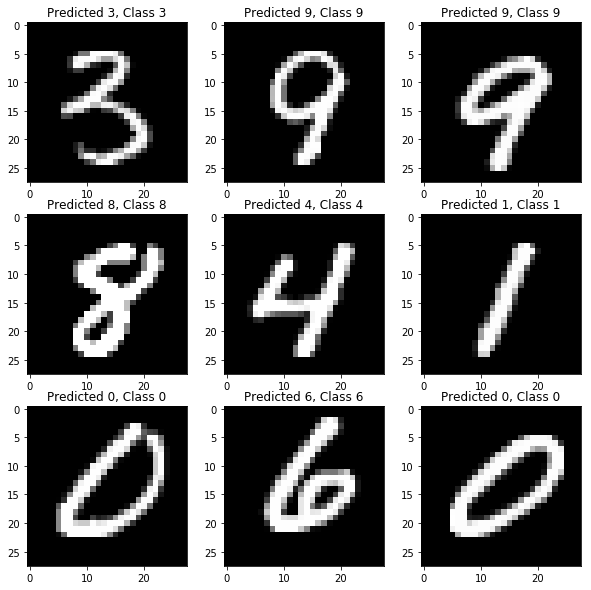

In [13]:
# Mostramos muestras correctamente clasificadas
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

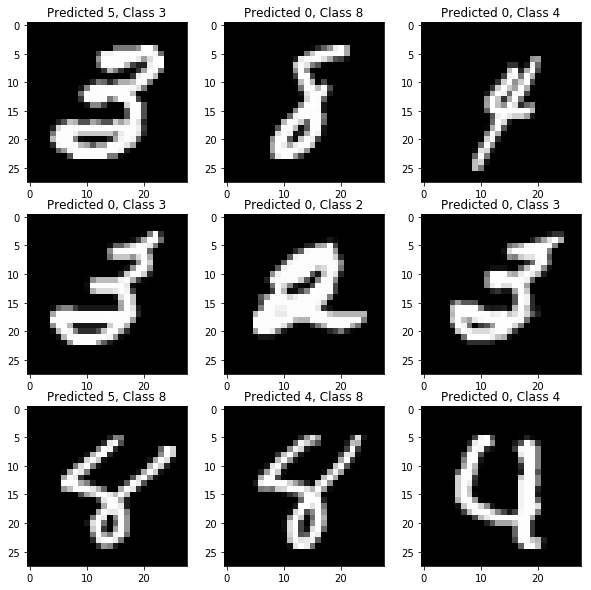

In [14]:
# Mostramos muestras incorrectamente clasificadas
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

### 3.5 Añadiendo complejidad al modelo

#### Añadir más neuronas a la capa oculta

In [15]:
# Diseño de la arquitectura de la red neuronal
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer = Dense(512, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model= Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(X_val, Y_val)
         )

# Obtención de métricas
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 5000 samples
Epoch 1/4
60000/60000 [==============================] - 6s 100us/step - loss: 0.2716 - acc: 0.9232 - val_loss: 0.1771 - val_acc: 0.9476
Epoch 2/4
60000/60000 [==============================] - 6s 98us/step - loss: 0.1081 - acc: 0.9684 - val_loss: 0.1390 - val_acc: 0.9564
Epoch 3/4
60000/60000 [==============================] - 6s 96us/step - loss: 0.0702 - acc: 0.9793 - val_loss: 0.1076 - val_acc: 0.9660
Epoch 4/4
60000/60000 [==============================] - 6s 95us/step - loss: 0.0491 - acc: 0.9855 - val_loss: 0.0987 - val_acc: 0.9712
Test score: 0.04634636013321578
Test accuracy: 0.9846


#### Añadir más capas ocultas

In [16]:
# Diseño de la arquitectura de la red neuronal
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(512, activation='relu')(input_layer)
hidden_layer_2 = Dense(512, activation='relu')(hidden_layer_1)
output_layer = Dense(10, activation='softmax')(hidden_layer_2)
model= Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(X_val, Y_val)
         )

# Obtención de métricas
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 60000 samples, validate on 5000 samples
Epoch 1/4
60000/60000 [==============================] - 10s 161us/step - loss: 0.2200 - acc: 0.9354 - val_loss: 0.1453 - val_acc: 0.9562
Epoch 2/4
60000/60000 [==============================] - 9s 155us/step - loss: 0.0813 - acc: 0.9749 - val_loss: 0.1143 - val_acc: 0.9646
Epoch 3/4
60000/60000 [==============================] - 9s 156us/step - loss: 0.0523 - acc: 0.9832 - val_loss: 0.1105 - val_acc: 0.9674
Epoch 4/4
60000/60000 [==============================] - 9s 155us/step - loss: 0.0363 - acc: 0.9883 - val_loss: 0.0932 - val_acc: 0.9698
Test score: 0.03711018516999902
Test accuracy: 0.9894


#### Añadimos dropout para evitar overfitting

Es muy común que al comenzar a aprender machine learning caigamos en el problema del Overfitting. Lo que ocurrirá es que nuestra máquina sólo se ajustará a aprender los casos particulares que le enseñamos y será incapaz de reconocer nuevos datos de entrada. 

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/overfitting.png)







In [17]:
# Diseño de la arquitectura de la red neuronal
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(512, activation='relu')(input_layer)
dropout_1 = Dropout(0.2)(hidden_layer_1)
hidden_layer_2 = Dense(512, activation='relu')(hidden_layer_1)
dropout_2 = Dropout(0.2)(hidden_layer_2)
output_layer = Dense(10, activation='softmax')(dropout_2)
model= Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(X_val, Y_val)
         )

# Obtención de métricas
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

W0626 17:11:20.353805 140014447961984 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 5000 samples
Epoch 1/4
60000/60000 [==============================] - 10s 173us/step - loss: 0.2300 - acc: 0.9318 - val_loss: 0.1418 - val_acc: 0.9576
Epoch 2/4
60000/60000 [==============================] - 10s 164us/step - loss: 0.0850 - acc: 0.9737 - val_loss: 0.1009 - val_acc: 0.9668
Epoch 3/4
60000/60000 [==============================] - 10s 166us/step - loss: 0.0545 - acc: 0.9831 - val_loss: 0.0898 - val_acc: 0.9710
Epoch 4/4
60000/60000 [==============================] - 10s 165us/step - loss: 0.0399 - acc: 0.9869 - val_loss: 0.1055 - val_acc: 0.9706
Test score: 0.0437254047883238
Test accuracy: 0.988


## 4. Construcción de una red neuronal convolucional mediante Keras

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/neural_network.png)

La CNN es un tipo de Red Neuronal Artificial con aprendizaje supervisado que procesa sus capas imitando al cortex visual del ojo humano para identificar distintas características en las entradas que en definitiva hacen que pueda identificar objetos y «ver». Para ello, la CNN contiene varias capas ocultas especializadas y con una jerarquía: esto quiere decir que las primeras capas pueden detectar lineas, curvas y se van especializando hasta llegar a capas más profundas que reconocen formas complejas como un rostro o la silueta de un animal.

Para comenzar, la red toma como entrada los pixeles de una imagen. Si tenemos una imagen con apenas 28×28 pixeles de alto y ancho, eso equivale a  784 neuronas. Y eso es si sólo tenemos 1 color (escala de grises). Si tuviéramos una imagen a color, necesitaríamos 3 canales (red, green, blue) y entonces usaríamos 28x28x3 = 2352 neuronas de entrada. Esa es nuestra capa de entrada. Para continuar con el ejemplo, supondremos que utilizamos la imagen con 1 sólo color.


**Capa Convolucional**

Ahora comienza el «procesado distintivo» de las CNN. Es decir, haremos las llamadas «convoluciones»: Estas consisten en tomar «grupos de pixeles cercanos» de la imagen de entrada e ir operando matemáticamente (producto escalar) contra una pequeña matriz que se llama kernel. Ese kernel supongamos de tamaño 3×3 pixels «recorre» todas las neuronas de entrada (de izquierda-derecha, de arriba-abajo) y genera una nueva matriz de salida, que en definitiva será nuestra nueva capa de neuronas ocultas.

**Filtro: Conjunto de Kernels**

En realidad, no aplicaremos 1 sólo kernel, si no que tendremos muchos kernel (su conjunto se llama filtros). Por ejemplo en esta primer convolución podríamos tener 32 filtros, con lo cual realmente obtendremos 32 matrices de salida (este conjunto se conoce como «feature mapping»), cada una de 28x28x1 dando un total del 25.088 neuronas para nuestra PRIMER CAPA OCULTA de neuronas.

A medida que vamos desplazando el kernel y vamos obteniendo una «nueva imagen» filtrada por el kernel. En esta primer convolución y siguiendo con el ejemplo anterior, es como si obtuviéramos 32 «imágenes filtradas nuevas». Estas imágenes nuevas lo que están «dibujando» son ciertas características de la imagen original. Esto ayudará en el futuro a poder distinguir un objeto de otro.

**La función de Activación**

La función de activación más utilizada para este tipo de redes neuronales es la llamada ReLu

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/convolucionales.png)

**Subsampling: Capa MaxPooling**

Ahora viene un paso en el que reduciremos la cantidad de neuronas antes de hacer una nueva convolución. ¿Por qué? Como vimos, a partir de nuestra imagen blanco y negro de 28x28px tenemos una primer capa de entrada de 784 neuronas y luego de la primer convolución obtenemos una capa oculta de 25.088 neuronas -que realmente son nuestros 32 mapas de características de 28×28-

Si hiciéramos una nueva convolución a partir de esta capa, el número de neuronas de la próxima capa se iría por las nubes (y ello implica mayor procesamiento)! Para reducir el tamaño de la próxima capa de neuronas haremos un proceso de subsampling en el que reduciremos el tamaño de nuestras imágenes filtradas pero en donde deberán prevalecer las características más importantes que detectó cada filtro.


**Conectar con una red neuronal «tradicional».**

Para terminar, tomaremos la última capa oculta a la que hicimos subsampling, que se dice que es «tridimensional» por tomar la forma -en nuestro ejemplo- 3x3x128 (alto,ancho,mapas) y la «aplanamos», esto es que deja de ser tridimensional, y pasa a ser una capa de neuronas «tradicionales», de las que ya conocíamos.

Entonces, a esta nueva capa oculta «tradicional», le aplicamos una función llamada Softmax que conecta contra la capa de salida final que tendrá la cantidad de neuronas correspondientes con las clases que estamos clasificando. Si clasificamos perros y gatos, serán 2 neuronas. Si es el dataset Mnist numérico serán 10 neuronas de salida. Si clasificamos coches, aviones ó barcos serán 3, etc.

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/Typical_cnn.png)


### 4.1 Carga de datos

#### Preproceso de datos
- Reshape a tamaño 28x28x1

In [18]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)[..., np.newaxis]
X_val = X_val.reshape(X_val.shape[0], 28, 28)[..., np.newaxis]
X_test = X_test.reshape(X_test.shape[0], 28, 28)[..., np.newaxis]
print("X_train dimensions", X_train.shape)
print("X_val dimensions", X_val.shape)
print("X_test dimensions", X_test.shape)

X_train dimensions (60000, 28, 28, 1)
X_val dimensions (5000, 28, 28, 1)
X_test dimensions (5000, 28, 28, 1)


### 4.2 Diseño de la arquitectura de la red neuronal convolucional

In [19]:
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], 1))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)
model.summary()

W0626 17:12:01.311469 140014447961984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

#### Compilación


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4.3 Entrenamiento

In [21]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(X_val, Y_val)
         )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 5000 samples
Epoch 1/4
60000/60000 [==============================] - 21s 354us/step - loss: 0.3112 - acc: 0.9095 - val_loss: 0.1306 - val_acc: 0.9582
Epoch 2/4
60000/60000 [==============================] - 21s 350us/step - loss: 0.0860 - acc: 0.9733 - val_loss: 0.0946 - val_acc: 0.9694
Epoch 3/4
60000/60000 [==============================] - 21s 345us/step - loss: 0.0642 - acc: 0.9794 - val_loss: 0.0748 - val_acc: 0.9754
Epoch 4/4
60000/60000 [==============================] - 21s 343us/step - loss: 0.0513 - acc: 0.9842 - val_loss: 0.0710 - val_acc: 0.9752


### 4.4 Evaluación del modelo

#### Obtención de métricas


In [22]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.02724249040670693
Test accuracy: 0.9922


## 5. Caso práctico

Diseñar un modelo adecuado capaz de clasificar el dataset CIFAR 10, disponible en keras.

###CIFAR 10

Este es un dataset de 50000 imagenes a color etiquetadas en 10 categorías diferentes. Cuenta con 10000 imagenes para test.

Las clases a predecir son:

- airplane 
- automobile 
- bird 
- cat 
- deer 
- dog 
- frog 
- horse 
- ship 
- truck



![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/cifar_preview.png)

In [0]:
from keras.datasets import cifar10 # Dataset a utilizar

In [24]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


##6. Conclusiones

![texto alternativo](https://raw.githubusercontent.com/josangar/Curso_Deep_Learning/master/Seminario1/images/comparativa.PNG)

##7. Configuración del entorno local de trabajo

Instalar:

- PyCharm (IDE)
- Distribución 3.6.8 de Python (Interprete)
- Instalar poetry (gestor de librerías)

Para utilizar GPU
- Instalar CUDA 9.0 seguir este tutorial:
https://medium.com/@akshaysin_86681/installing-cuda-and-cudnn-on-windows-10-f735585159f7

1. Crear una carpeta de proyecto (repositorio GitHub/BitBucket)
2. Abrir la carpeta en PyCharm
3. Configurar intérprete:

        File>Settings>Projects>Projects Interpreter

                1. Add Python Interpreter
                2. Virtual Environment:
                          Location: Project\venv
                          Base Interpreter:select python.exe
                  
3. Ejecutar **poetry init (generará un venv)**
4. Ejecutar **poetry install "library"** (con cada librería que queramos instalar)
5. Ejecutar **poetry install -D iPython** (para contar con iPython solo en modo Desarrollador)
6. Comenzar a desarrollar


